# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`

In [1]:
! git clone https://github.com/amn8ge/wrangling_assignment.git
# cloning from my own fork of the github assignment

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 9 (from 1)
Receiving objects: 100% (20/20), 5.84 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
cd wrangling_assignment/

/content/wrangling_assignment


In [3]:
cd data/

# setting my current directory to the data file that stores all necessary files

/content/wrangling_assignment/data


In [4]:
ls -al

total 12192
drwxr-xr-x 2 root root    4096 Sep  2 01:07 ./
drwxr-xr-x 4 root root    4096 Sep  2 01:07 ../
-rw-r--r-- 1 root root 3414307 Sep  2 01:07 airbnb_hw.csv
-rw-r--r-- 1 root root 7181667 Sep  2 01:07 justice_data.parquet
-rw-r--r-- 1 root root 1873502 Sep  2 01:07 mn_police_use_of_force.csv


**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
airbnb = pd.read_csv('airbnb_hw.csv',low_memory=False)
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Question 1.1

In [6]:

airbnb['price_clean'] = airbnb['Price'].str.replace('$', '').str.replace(',', '')
airbnb['price_clean'] = pd.to_numeric(airbnb['price_clean'], errors='coerce')
airbnb['price_clean']
airbnb.head()

# I cleaned the set by removing dollar signs and commas so that every number is
# formatted as an integer. This means that numbers over 999 are still treated
# as numbers. I also checked for missing values but there were none
# so I did not remove them

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,price_clean
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,199
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,549


In [15]:
missing_price_count = int(airbnb['Price'].isna().sum())
print(missing_price_count)

# there are no missing values

0


Question 1.2

In [44]:
police = pd.read_csv('mn_police_use_of_force.csv',low_memory=False)
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [45]:
print(police['subject_injury'].unique(),'\n')

[nan 'No' 'Yes'] 



In [46]:
police['subject_injury'].value_counts(dropna=False)

,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [47]:
police['subject_injury_clean'] = police['subject_injury'].str.strip().str.lower().replace({'yes':'Yes', 'no':'No'})
prop_missing = police['subject_injury_clean'].isna().mean()
print(prop_missing)
pd.crosstab(police['subject_injury_clean'], police['force_type'], dropna=False)

0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


76% of the values are missing, which is cause for concern.

There is a strong positive relationship between when data for subject injury are missing and bodily force on the part of the police, a relationship that is echoed by the difference between the number of times maximal restraints and tasers were used on subjects whose injury status was NA compared to subjects whose injury status was Yes or No.

Question 1.3

In [49]:
justice = pd.read_parquet('justice_data.parquet')
justice['WhetherDefendantWasReleasedPretrial'].unique()
justice['released_pretrial'] = justice['WhetherDefendantWasReleasedPretrial'].replace(np.nan, 9)
justice.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants,released_pretrial
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,999,999,,4,1,0,Defendant could not be classified or tracked d...,9
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...,0
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...,0
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...,0
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...,1


Question 1.4

In [51]:
justice['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()
justice['ImposedSentenceAllChargeInContactEvent'].unique()
justice['imposed_clean'] = pd.to_numeric(justice['ImposedSentenceAllChargeInContactEvent'], errors='coerce')
non_incarc = ['Fine', 'Probation', 'Community Service']
justice.loc[justice['SentenceTypeAllChargesAtConvictionInContactEvent'].isin(non_incarc) & justice['imposed_clean'].isna(),
            'imposed_clean'] = 0

I compared the two different variables within the justice set, renaming one to imposed_clean so it'd be easier to work with. I compared the sentence length and the sentence type to see if there were sentences that did not involve time served, then made variables for those sentences that didn't involve incarceration.

Any NaN variable in the previous category was changed to a 0 to reflect the zero time served.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Question 2.1

In [34]:
# at this point, I uploaded the GSAF5 file into the data folder in my content hub
# in colab so that I could access it in the same manner as I was accessing other files
shark = pd.read_excel('GSAF5.xls', sheet_name=0)
print(shark.columns)
shark.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Question 2.2

In [55]:
shark_dropped = shark.drop(['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'], axis=1)
shark_dropped.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Type_clean,Fatal_clean
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,Provoked,N
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,Unprovoked,N
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,Unprovoked,N
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF,Unprovoked,N
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,Unprovoked,N


Question 2.3

In [57]:
shark['year_clean'] = pd.to_numeric(shark['Year'], errors='coerce')
drop_na_shark = shark.dropna(subset=['year_clean'])
filtered = drop_na_shark[drop_na_shark['year_clean'] >= 1940]
num_attacks = filtered.groupby('Year').size()
print(num_attacks)

#shark_after1940 = shark[shark['Year'] >= 1940]
#shark_after1940.head()

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     52
2025.0     48
2026.0      1
Length: 87, dtype: int64


The number of attacks ranges from 1 to 143.

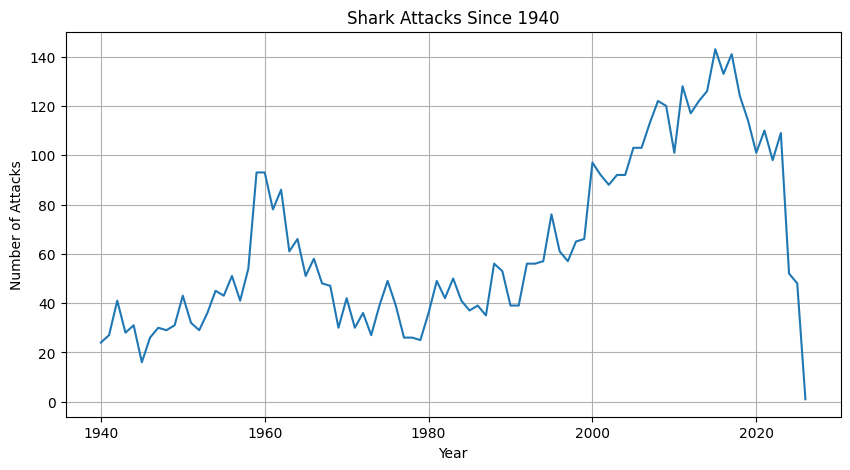

In [21]:
shark_after1940['Year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Shark Attacks Since 1940')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

Shark attacks had been increasing since 1940 up until the last two years, when we've seen them decrease very suddenly.

Question 2.4

In [60]:
shark['age_clean'] = shark['Age'].astype(str).str.strip()
# the age column is pretty messy (20s, teen, 35, etc, so cleaning it up a lot)
shark['age_clean'] = shark['Age'].str.extract(r'(\d+)')
# removing extraneous information from values
shark['age_clean'] = pd.to_numeric(shark['age_clean'], errors='coerce')
# reconverting them all to numbers
shark = shark[(shark['age_clean'] >= 1) & (shark['age_clean'] <=100)]
# making the range of values between 1 and 100
shark.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Type_clean,Fatal_clean,year_clean,age_clean
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,N,2025.0,63
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,N,2025.0,9
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,N,2025.0,39
5,28th July,2025.0,Unprovoked,Australia,South Australia,Seacliff beach Adelaide,Kayaking,Nathaniel Drummond,M,19,...,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,N,2025.0,19
6,25th July,2025.0,Unprovoked,French Polynesia,Nuku Hiva,Taiohae Bay,Swimming,Male child,M,7,...,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,N,2025.0,7


Text(0, 0.5, 'Frequency')

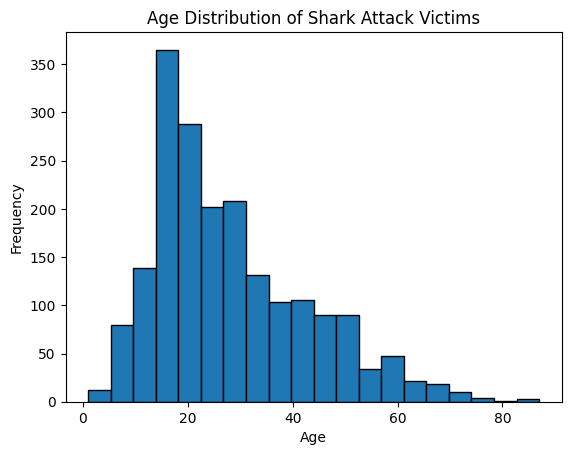

In [63]:
shark['age_clean'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')

Question 2.5

In [64]:
shark['Sex'].unique()
shark['sex_clean'] = shark['Sex'].astype(str).str.strip().str.upper()
shark['sex_clean'] = shark['sex_clean'].replace({'M': 'MALE', 'MALE': 'MALE', 'F': 'FEMALE', 'FEMALE': 'FEMALE'})
prop_male = (shark['sex_clean'] == 'MALE').mean()
print(prop_male)

0.831368528959508


Question 2.6

In [65]:
shark['Type'].unique()
shark['type_clean'] = shark['Type'].astype(str).str.strip().str.lower()
shark['type_clean'] = shark['type_clean'].replace({'provoked': 'Provoked', 'unprovoked': 'Unprovoked'})
shark.loc[~shark['type_clean'].isin(['Unprovoked', 'Provoked']), 'type_clean'] = 'Unknown'
prop_unprov = (shark['type_clean'] == 'Unprovoked').mean()
print(prop_unprov)

0.796514607893388


Question 2.7

In [66]:
shark["Fatal Y/N"].unique()
shark["fatal_clean"] = shark["Fatal Y/N"].str.strip().str.upper()
def clean_fatal(val):
  if val == "Y":
    return "Y"
  elif val == "N":
    return "N"
  else:
    return "Unknown"
shark["Fatal_Clean"] = (shark["Fatal Y/N"].astype(str).str.strip().str.upper().apply(clean_fatal))
print(shark['Fatal_Clean'].unique())

['N' 'Y' 'Unknown']


Question 2.8

In [70]:
unprov_attacks = shark[shark["Type"] == "Unprovoked"]
sex_unprov_attacks = unprov_attacks['Sex'].value_counts
print(sex_unprov_attacks)
print("\n")

fat_type = shark.groupby('Type')['Fatal_Clean'].value_counts().unstack()
print(fat_type)
print("\n")

fat_sex = shark.groupby('Fatal_Clean')['Sex'].value_counts().unstack()
print(fat_sex)

<bound method IndexOpsMixin.value_counts of 2       M
3       M
4       F
5       M
6       M
       ..
6930    F
6940    F
7005    M
7016    M
7041    M
Name: Sex, Length: 1553, dtype: object>


Fatal_Clean        N  Unknown      Y
Type                                
Invalid          4.0    154.0    3.0
Provoked       156.0      2.0    5.0
Questionable     6.0      2.0    4.0
Sea Disaster    14.0      NaN   11.0
Unprovoked    1273.0     11.0  269.0
Watercraft      34.0      NaN    1.0
unprovoked       1.0      NaN    NaN


Sex              F   F        M   M 
Fatal_Clean                         
N            242.0  2.0  1228.0  1.0
Unknown       26.0  NaN   140.0  NaN
Y             36.0  NaN   253.0  NaN


It seems from the data that sharks are more likely to launch unprovoked attacks on men, and these unprovoked attacks are more likely to be fatal than provoked attacks. Therefore, shark attacks are more likely to be fatal if the victim is male. I do like sharks, however, because they're vital to our ecosystem. I'm also a girl- maybe I'd feel differently if I were a part of the shark food group.

Question 2.9

In [71]:
shark['species_clean'] = shark['Species '].astype(str).str.lower()
shark['gw'] = shark['species_clean'].str.contains('white', na=False)
prop_gw = shark['gw'].mean()
print(prop_gw)

0.08918503331624808
